Alpha: 0.001, Dev Accuracy: 0.6704
Alpha: 0.01, Dev Accuracy: 0.6704
Alpha: 0.1, Dev Accuracy: 0.6713
Alpha: 0.5, Dev Accuracy: 0.6718
Alpha: 1, Dev Accuracy: 0.6721
Alpha: 2, Dev Accuracy: 0.6667
Alpha: 5, Dev Accuracy: 0.6583
Alpha: 10, Dev Accuracy: 0.6452

Best alpha value: 1 with Dev Accuracy: 0.6721

Test Accuracy: 0.6839773566330298
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.70      0.56      0.62      1877
           1       0.68      0.79      0.73      2186

    accuracy                           0.68      4063
   macro avg       0.69      0.68      0.67      4063
weighted avg       0.69      0.68      0.68      4063



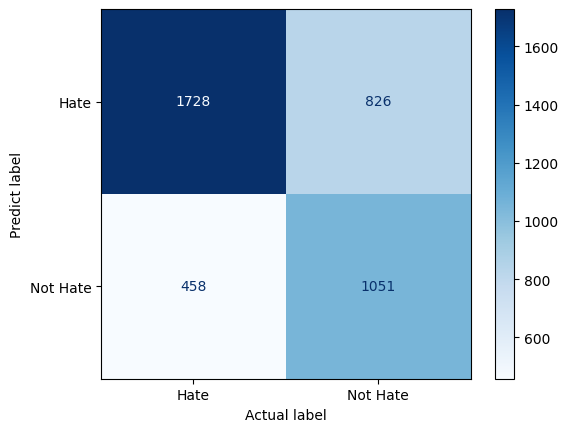

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.sparse import vstack
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/dynamically-generated-hate-speech.csv')

# Extract the relevant columns
texts = data['text']
labels = data['label'].apply(lambda x: 1 if x == "hate" else 0)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the vectorizer on the texts
text_features = tfidf_vectorizer.fit_transform(texts)

# Splitting the data into training (80%) and a temporary set (20%)
X_train, X_temp, y_train, y_temp = train_test_split(text_features, labels, test_size=0.2, random_state=42)

# Splitting the temporary set into development and test sets (each 10% of the original dataset)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the alpha range
alpha_range = [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10]
alpha_scores = []

# Evaluate each alpha on the development set
for alpha in alpha_range:
    nb = MultinomialNB(alpha=alpha)
    nb.fit(X_train, y_train)  # Train on the training set
    y_dev_pred = nb.predict(X_dev)  # Predict on the development set
    dev_accuracy = accuracy_score(y_dev, y_dev_pred)  # Calculate accuracy on the development set
    alpha_scores.append(dev_accuracy)
    print(f"Alpha: {alpha}, Dev Accuracy: {dev_accuracy:.4f}")

# Find the best alpha and its corresponding accuracy
best_index = alpha_scores.index(max(alpha_scores))
best_alpha = alpha_range[best_index]
best_dev_accuracy = alpha_scores[best_index]

print(f"\nBest alpha value: {best_alpha} with Dev Accuracy: {best_dev_accuracy:.4f}\n")

# Concatenate the training and development sets
X_train_final = vstack([X_train, X_dev])
y_train_final = pd.concat([y_train, y_dev])

# Train a new classifier using the best alpha on the combined training and development sets
nb_classifier_best = MultinomialNB(alpha=best_alpha)
nb_classifier_best.fit(X_train_final, y_train_final)

# Predict on the test set
y_test_pred = nb_classifier_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Generate and print classification report for the test set
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report on Test Set:\n", classification_rep)

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred, labels=[1, 0])  # 0 for 'not hate', 1 for 'hate'
cm_transposed = cm.T
display = ConfusionMatrixDisplay(confusion_matrix=cm_transposed, display_labels=['Hate', 'Not Hate'])
display.plot(cmap='Blues')
plt.xlabel('Actual label')
plt.ylabel('Predict label')
plt.show()



In [39]:
import numpy as np
import random

# Assuming you already have the following variables from your previous code:
# X_train, X_test, y_train, y_test, nb_classifier, texts, labels

# Predict on the development set
y_pred_dev = nb_classifier.predict(X_test)

# Identify incorrect predictions
incorrect_indices = np.where(y_pred_dev != y_test.to_numpy())[0]

# Get the original indices from y_test for the incorrect predictions
original_incorrect_indices = y_test.index[incorrect_indices]

# Print the total number of predictions 
print(f"Total predictions: {len(y_pred_dev)}")
# Print the total number of incorrect predictions
print(f"Total incorrect predictions: {len(incorrect_indices)}\n")
# Print the percentage of incorrect predictions
print(f"Percentage of incorrect predictions: {len(incorrect_indices) / len(y_pred_dev) * 100:.2f}%")

# Randomly sample from incorrect predictions
sample_size = 50  # or any other number you prefer
sampled_indices = random.sample(list(original_incorrect_indices), sample_size)

# Display the sampled incorrect predictions
for index in sampled_indices:
    print(f"Text: {texts.loc[index]}")
    print(f"Actual Label: {labels.loc[index]}, Predicted Label: {y_pred_dev[incorrect_indices[np.where(original_incorrect_indices == index)[0][0]]]}")
    print("------\n")


Total predictions: 4063
Total incorrect predictions: 1288

Percentage of incorrect predictions: 31.70%
Text: You´ve got yourself some high quality shit over there!
Actual Label: 0, Predicted Label: 0
------

Text: refugees look violent
Actual Label: 1, Predicted Label: 1
------

Text: im dead
Actual Label: 0, Predicted Label: 1
------

Text: Politicians are villainous
Actual Label: 0, Predicted Label: 0
------

Text: Coronavirus: Parents sending sick, symptomatic kids to school
Actual Label: 1, Predicted Label: 1
------

Text: muslims shouldn't be allowed to exist
Actual Label: 1, Predicted Label: 1
------

Text: biden is a rapist
Actual Label: 0, Predicted Label: 0
------

Text: I don't want our culture diluted by Jews
Actual Label: 1, Predicted Label: 0
------

Text: We dont want no Bombers round here.
Actual Label: 1, Predicted Label: 1
------

Text: My neighbourhood is packed with Camel Jockeys
Actual Label: 1, Predicted Label: 1
------

Text: My hood is full of SHylocks
Actual Lab